# Coursera 机器学习 python版

## 编程作业一 线性回归（一元及多元）

**说明** 

Andrew Ng的机器学习课程编程作业的python版， 基于他的作业pdf的步骤， 尽量细化步骤并添加一些数学公式， 让人多理解算法及数学推导过程。 

*注*
只看英文的， 出门右转， 不送。

首先导入一些 python 的常用包， 相应教程请先自行网上搜索。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 第一部分 一元线性回归

pdf 最开始是 Octave 热身， 我就不多余地弄一个了。

在开始正式学习之前， 先读取数据,  并绘个图， 给自己一个直观的印象。

方案一： 用 pandas 读取 csv 文件， 并显示数据的前三行

提示： 用pandas的话， 注意别把第一行的数据当成列名了， 可以使用names=['population', 'profit']， 你用 names = ['x', 'y'] 也可以。

In [2]:
data = pd.read_csv('ex1data1.txt',  names=['population', 'profit'])
print data.head(3)

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620


### 1.1 数据可视化， 绘图

使用pyplot, 绘制散点图（scatter 或 plot), 带标题名和横竖坐标名， 最好再调整下范围， x轴上， 5左边太空旷了。

提示： 如果使用的是 pandas 读取到的 DataFrame，  data[列名] 得到的是 Series, 不能用， 还需要 data[列名].values 才能得到 ndarray.

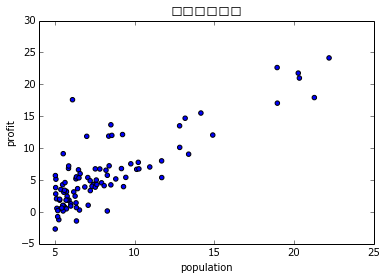

In [3]:
plt.scatter(data['population'].values, data['profit'].values)
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title(u"一元线性回归")

### 1.2 梯度下降

* 预备备—— 一元线性回归 $h_\theta(x) = \theta_0 + \theta_1 x_1$

机器学习三要素——模型、 策略、 算法。  

确认本次练习的**模型**为 一元线性回归

定义：

1. 输入数据量大小为 m, 输入表示为 $ \mathbf{X} $, 输出表示为 $\mathbf{y} $
2. 待学习的权重向量维度为n，  此处 n = 1, 另有第0维,  表示为 $ \vec{\theta} = [ \theta_0, \theta_1] $

$ h_\theta(x) = \sum\limits^{n}_{i=0} \theta_i x_i = \vec{\theta}^\mathrm{T} X $

根据公式， 我们需要:

1. 输入变量 x (本来应该是大写， 我懒改了) ，  m x (n+1) 维,  第0维初始化为1
2. 输出变量 y
3. 权重向量变量  theta

方案一 使用pandas：

变量 x 为DataFrame, 有两个列， x0 和 x1,  其中， x0 列的值全部为 1

变量 theta 初始化为[0, 0] 的 ndarray

In [4]:
x = pd.DataFrame()
x['x0'] = np.ones(len(data))
x['x1'] = data['population']
x = x.values
y = data['profit'].values
theta = np.zeros(2)

* 选择策略 —— 误差函数成本函数 (cost function)

回归分析一般都使用均方根误差、 拟合标准差 (RMSE  Root mean squared error),  但此处 ng 使用的是均方差(MSE) 再除常数2。

$ J(\theta) = \frac{1}{2m} \sum\limits^{m}_{i=1}(h_\theta(x^i) - y^i)^2$

i 表示 第i条数据， 即第i行的值

请实现该函数：

In [5]:
def compute_cost(x, y, theta):
    x_ = np.dot(x, theta.T) - y
    return sum(x_ * x_) / (2 * len(x))

* 计算初始的误差值

即 theta = [0 0]

In [6]:
print compute_cost(x, y, theta)

32.0727338775


* 梯度下降参数初始化

迭代次数及学习率$\alpha$

In [7]:
iterations = 1500
alpha = 0.01

* 运行梯度下降

$ \theta_j := \theta_j - \alpha\frac{1}{m}\sum\limits^{m}_{i=1}(h_\theta(x^i) - y^i)x^i_j$

$ \theta = \theta - \alpha\vec{\theta}^\mathrm{T} X $

请实现梯度下降法的函数——这部分的推导先推后。

In [8]:
def gradient_descent(x, y, theta, alpha, iterations):
    ntheta = theta[:]
    m = len(x)
    for i in range(iterations):
        #print ntheta, 
        x_ = np.dot(x.T, np.dot(x, ntheta.T) - y) 
        
        ntheta = ntheta - alpha * x_ / m
        #print compute_cost(x, y, ntheta)
    return ntheta


In [25]:
theta = gradient_descent(x, y, theta, alpha, iterations)
print 'Theta found by gradient descent: '
print "%f %f " % tuple(theta)

Theta found by gradient descent: 
-3.895781 1.193034 
(97, 2) (2,)


(97,)

* 根据模型绘图


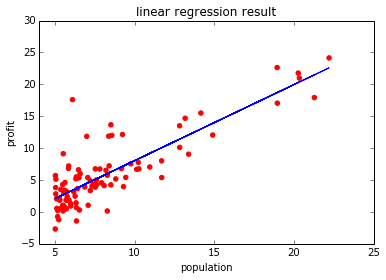

In [30]:
plt.scatter(data['population'].values, data['profit'].values, color = 'red')
plt.plot(data['population'].values, np.dot(x, theta), color='blue')
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title("linear regression result")

* 预测

预测人口 为35000 和 70000时的值

In [55]:
pred_x = np.array([[1, 3.5], [1, 7]])

pred_y = np.dot(pred_x, theta)


In [35]:
print 'For population = 35,000, we predict a profit of %f\n'  % (pred_y[0] * 10000)
print 'For population = 70,000, we predict a profit of %f\n'  % (pred_y[1] * 10000)

For population = 35,000, we predict a profit of 2798.368764

For population = 70,000, we predict a profit of 44554.546310



* 对误差函数进行可视化分析

In [41]:
theta0 = np.linspace(-10, 10, 100)
theta1 = np.linspace(-1, 4, 100)

-9.19191919192


初始化 J_vals 为一个 0 矩阵， theta0 x theta1 维

计算各点 对应的 误差值

In [44]:
J_vals = np.zeros((len(theta0), len(theta1)))

for i in range(len(theta0)):
    for j in range(len(theta1)):
        t = np.array([theta0[i], theta1[j]])
        J_vals[i][j] = compute_cost(x, y, t)

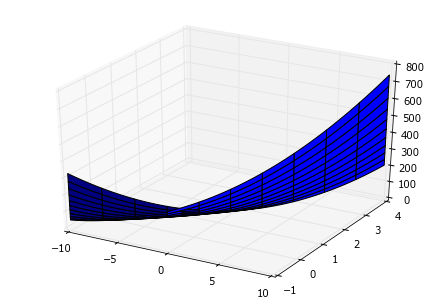

In [46]:
import mpl_toolkits.mplot3d.axes3d as p3
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.plot_surface(theta0, theta1, J_vals)

* 轮廓绘图

<matplotlib.contour.QuadContourSet instance at 0x7fe54fa2e098>

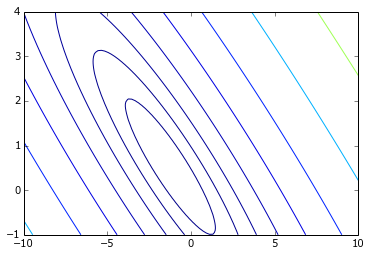

In [50]:
plt.contour( theta0, theta1, J_vals, np.logspace(-2, 3, 20))

### 比较
与 sklearn 或 scipy 的现成结果比较

sklearn 得到的结果     为: 截距 -3.895781    斜率  1.193034 
你实现的梯度下降结果为: 截距 -3.895781    斜率  1.193034 


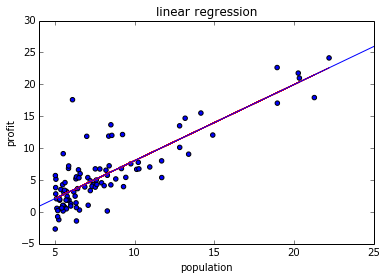

In [54]:
from sklearn.linear_model import LinearRegression as lm
columns = data.columns[:-1]
model = lm()
model.fit(data[columns].values, data['profit'].values)
print "sklearn 得到的结果     为: 截距 %f    斜率  %f "  % (model.intercept_, model.coef_)
print "你实现的梯度下降结果为: 截距 %f    斜率  %f " % tuple(theta)
pred = model.predict(data[columns].values)

plt.scatter(data['population'].values, data['profit'].values)
plt.xlabel("population")
plt.ylabel("profit")
plt.xlim(4, 25)
plt.title(u"linear regression")
prd = model.predict(data[columns].values)
plt.plot(data['population'].values, prd, color='red')
plt.plot(px, mypred , color='blue')

## 完成， 谢谢